In [2]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict
if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [3]:
env = BlackjackEnv()

In [6]:
def make_epsilon_greedy_policy(Q, epsilon, nA):
    """
    Creates an epsilon-greedy policy based on a given Q-function and epsilon.
    
    Args:
        Q: A dictionary that maps from state -> action-values.
            Each value is a numpy array of length nA (see below)
        epsilon: The probability to select a random action . float between 0 and 1.
        nA: Number of actions in the environment.
    
    Returns:
        A function that takes the observation as an argument and returns
        the probabilities for each action in the form of a numpy array of length nA.
    
    """
    def policy_fn(observation):
        P = np.ones(nA) * (epsilon / nA)
        P[np.argmax(Q[observation])] += (1 - epsilon)
        return P
    
    return policy_fn

In [7]:
def mc_control_epsilon_greedy(env, num_episodes, discount_factor=1.0, epsilon=0.1):
    """
    Monte Carlo Control using Epsilon-Greedy policies.
    Finds an optimal epsilon-greedy policy.
    
    Args:
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
        epsilon: Chance the sample a random action. Float betwen 0 and 1.
    
    Returns:
        A tuple (Q, policy).
        Q is a dictionary mapping state -> action values.
        policy is a function that takes an observation as an argument and returns
        action probabilities
    """
    
    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final action-value function.
    # A nested dictionary that maps state -> (action -> action-value).
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    
    # The policy we're following
    policy = make_epsilon_greedy_policy(Q, epsilon, env.action_space.n)
    
    # Implement this!
    for i in range(1, num_episodes + 1):
        if i % 1000 == 0:
            print(f"Episode {i} of {num_episodes}")
            
        # Generate an episode.
        # An episode is an array of (state, action, reward) tuples
        episode = []
        state = env.reset()
        for t in range(100):
            probs = policy(state)
            action = np.random.choice(np.arange(len(probs)), p=probs)
            next_state, reward, done, _ = env.step(action)
            episode.append((state, action, reward))
            if done:
                break
            state = next_state

        # Find all (state, action) pairs we've visited in this episode
        # We convert each state to a tuple so that we can use it as a dict key
        sa_in_episode = set([(tuple(x[0]), x[1]) for x in episode])
        for state, action in sa_in_episode:
            sa_pair = (state, action)
            # Find the first occurance of the (state, action) pair in the episode
            first_occurence_idx = next(i for i,x in enumerate(episode)
                                       if x[0] == state and x[1] == action)
            # Sum up all rewards since the first occurance
            G = sum([x[2]*(discount_factor**i) for i,x in enumerate(episode[first_occurence_idx:])])
            # Calculate average return for this state over all sampled episodes
            returns_sum[sa_pair] += G
            returns_count[sa_pair] += 1.0
            Q[state][action] = returns_sum[sa_pair] / returns_count[sa_pair]
                    
    return Q, policy

In [10]:
Q, policy = mc_control_epsilon_greedy(env, num_episodes=1000000, epsilon=0.1)

Episode 1000 of 1000000
Episode 2000 of 1000000
Episode 3000 of 1000000
Episode 4000 of 1000000
Episode 5000 of 1000000
Episode 6000 of 1000000
Episode 7000 of 1000000
Episode 8000 of 1000000
Episode 9000 of 1000000
Episode 10000 of 1000000
Episode 11000 of 1000000
Episode 12000 of 1000000
Episode 13000 of 1000000
Episode 14000 of 1000000
Episode 15000 of 1000000
Episode 16000 of 1000000
Episode 17000 of 1000000
Episode 18000 of 1000000
Episode 19000 of 1000000
Episode 20000 of 1000000
Episode 21000 of 1000000
Episode 22000 of 1000000
Episode 23000 of 1000000
Episode 24000 of 1000000
Episode 25000 of 1000000
Episode 26000 of 1000000
Episode 27000 of 1000000
Episode 28000 of 1000000
Episode 29000 of 1000000
Episode 30000 of 1000000
Episode 31000 of 1000000
Episode 32000 of 1000000
Episode 33000 of 1000000
Episode 34000 of 1000000
Episode 35000 of 1000000
Episode 36000 of 1000000
Episode 37000 of 1000000
Episode 38000 of 1000000
Episode 39000 of 1000000
Episode 40000 of 1000000
Episode 4

Episode 321000 of 1000000
Episode 322000 of 1000000
Episode 323000 of 1000000
Episode 324000 of 1000000
Episode 325000 of 1000000
Episode 326000 of 1000000
Episode 327000 of 1000000
Episode 328000 of 1000000
Episode 329000 of 1000000
Episode 330000 of 1000000
Episode 331000 of 1000000
Episode 332000 of 1000000
Episode 333000 of 1000000
Episode 334000 of 1000000
Episode 335000 of 1000000
Episode 336000 of 1000000
Episode 337000 of 1000000
Episode 338000 of 1000000
Episode 339000 of 1000000
Episode 340000 of 1000000
Episode 341000 of 1000000
Episode 342000 of 1000000
Episode 343000 of 1000000
Episode 344000 of 1000000
Episode 345000 of 1000000
Episode 346000 of 1000000
Episode 347000 of 1000000
Episode 348000 of 1000000
Episode 349000 of 1000000
Episode 350000 of 1000000
Episode 351000 of 1000000
Episode 352000 of 1000000
Episode 353000 of 1000000
Episode 354000 of 1000000
Episode 355000 of 1000000
Episode 356000 of 1000000
Episode 357000 of 1000000
Episode 358000 of 1000000
Episode 3590

Episode 638000 of 1000000
Episode 639000 of 1000000
Episode 640000 of 1000000
Episode 641000 of 1000000
Episode 642000 of 1000000
Episode 643000 of 1000000
Episode 644000 of 1000000
Episode 645000 of 1000000
Episode 646000 of 1000000
Episode 647000 of 1000000
Episode 648000 of 1000000
Episode 649000 of 1000000
Episode 650000 of 1000000
Episode 651000 of 1000000
Episode 652000 of 1000000
Episode 653000 of 1000000
Episode 654000 of 1000000
Episode 655000 of 1000000
Episode 656000 of 1000000
Episode 657000 of 1000000
Episode 658000 of 1000000
Episode 659000 of 1000000
Episode 660000 of 1000000
Episode 661000 of 1000000
Episode 662000 of 1000000
Episode 663000 of 1000000
Episode 664000 of 1000000
Episode 665000 of 1000000
Episode 666000 of 1000000
Episode 667000 of 1000000
Episode 668000 of 1000000
Episode 669000 of 1000000
Episode 670000 of 1000000
Episode 671000 of 1000000
Episode 672000 of 1000000
Episode 673000 of 1000000
Episode 674000 of 1000000
Episode 675000 of 1000000
Episode 6760

Episode 954000 of 1000000
Episode 955000 of 1000000
Episode 956000 of 1000000
Episode 957000 of 1000000
Episode 958000 of 1000000
Episode 959000 of 1000000
Episode 960000 of 1000000
Episode 961000 of 1000000
Episode 962000 of 1000000
Episode 963000 of 1000000
Episode 964000 of 1000000
Episode 965000 of 1000000
Episode 966000 of 1000000
Episode 967000 of 1000000
Episode 968000 of 1000000
Episode 969000 of 1000000
Episode 970000 of 1000000
Episode 971000 of 1000000
Episode 972000 of 1000000
Episode 973000 of 1000000
Episode 974000 of 1000000
Episode 975000 of 1000000
Episode 976000 of 1000000
Episode 977000 of 1000000
Episode 978000 of 1000000
Episode 979000 of 1000000
Episode 980000 of 1000000
Episode 981000 of 1000000
Episode 982000 of 1000000
Episode 983000 of 1000000
Episode 984000 of 1000000
Episode 985000 of 1000000
Episode 986000 of 1000000
Episode 987000 of 1000000
Episode 988000 of 1000000
Episode 989000 of 1000000
Episode 990000 of 1000000
Episode 991000 of 1000000
Episode 9920

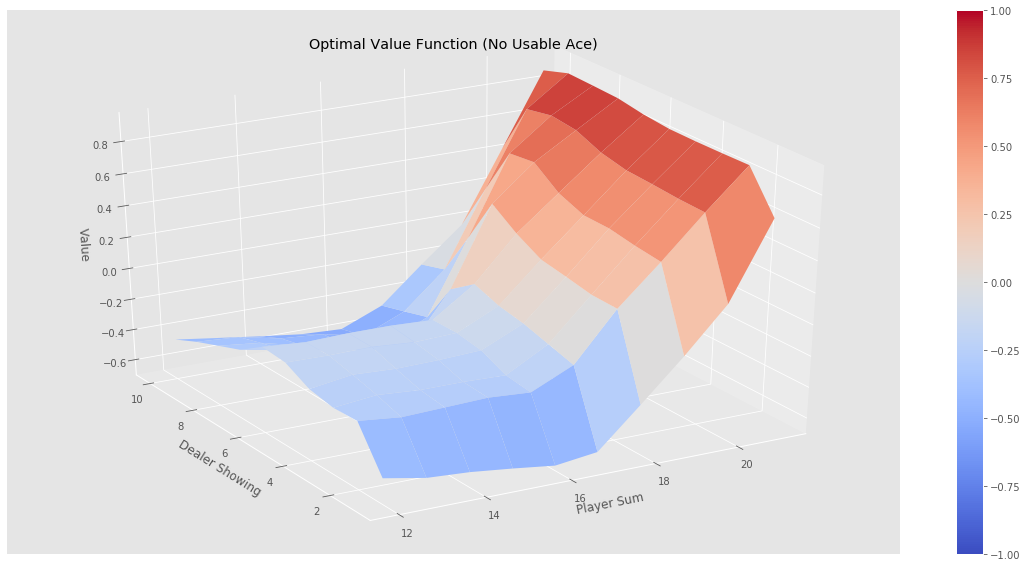

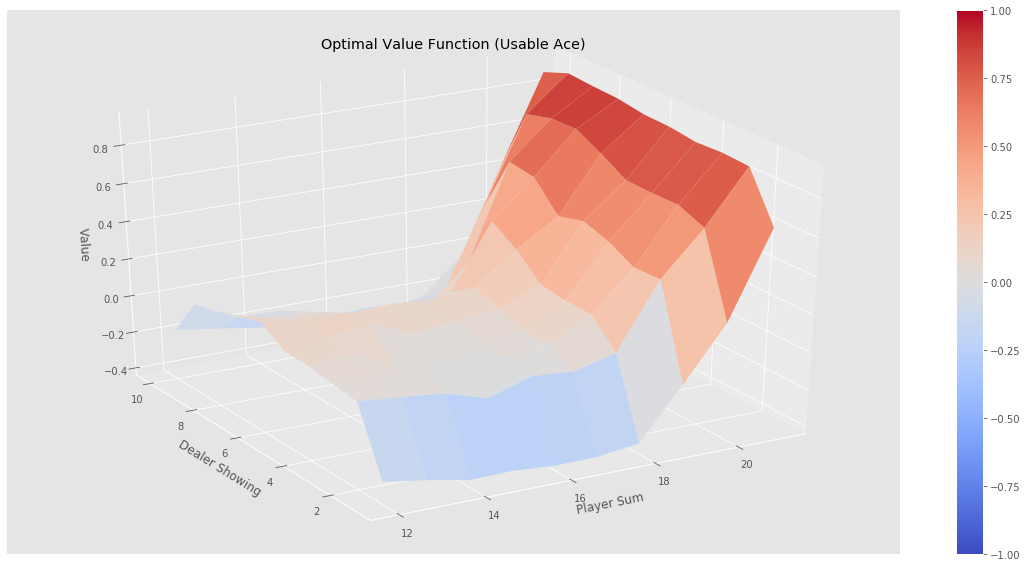

In [11]:
# For plotting: Create value function from action-value function
# by picking the best action at each state
V = defaultdict(float)
for state, actions in Q.items():
    action_value = np.max(actions)
    V[state] = action_value
plotting.plot_value_function(V, title="Optimal Value Function")